In [1]:
import avidaspatial as avsp
import glob
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib.rcParams.update({'font.size': 2})

In [2]:
#Handle sorting in numerical order
#From http://stackoverflow.com/questions/5967500/how-to-correctly-sort-a-string-with-a-number-inside

import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split('(\d+)', text) ]

In [3]:
env_files = glob.glob("/home/emily/hpcc/conservation/configs/*environment.cfg")

In [4]:
env_files.remove("/home/emily/hpcc/conservation/configs/conservation-initial-environment.cfg")
env_files.remove("/home/emily/hpcc/conservation/configs/conservation-0patches-environment.cfg")
env_files.remove("/home/emily/hpcc/conservation/configs/conservation-singlelarge-environment.cfg")



/home/emily/hpcc/conservation/configs/conservation-1patches_30each-environment.cfg
0
/home/emily/hpcc/conservation/configs/conservation-4patches_15each-environment.cfg
1
/home/emily/hpcc/conservation/configs/conservation-9patches_10each-environment.cfg
2
/home/emily/hpcc/conservation/configs/conservation-25patches_6each-environment.cfg
3
/home/emily/hpcc/conservation/configs/conservation-36patches_5each-environment.cfg
4
/home/emily/hpcc/conservation/configs/conservation-100patches_3each-environment.cfg
5
/home/emily/hpcc/conservation/configs/conservation-225patches_2each-environment.cfg
6
/home/emily/hpcc/conservation/configs/conservation-900patches_1each-environment.cfg
7


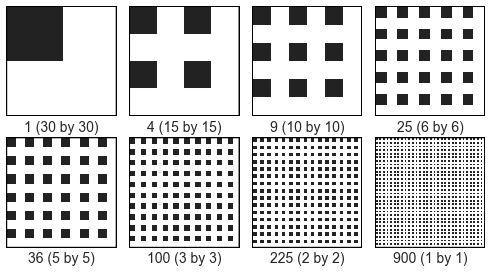

In [16]:
labels = ["1 (30 by 30)", "4 (15 by 15)", "9 (10 by 10)", "25 (6 by 6)", "36 (5 by 5)", 
         "100 (3 by 3)", "225 (2 by 2)", "900 (1 by 1)"]


env_files.sort(key=natural_keys)
for i,ef in enumerate(env_files):
    print(ef)
    print(i)
    sub = plt.subplot(2,4,i+1)
    env = avsp.parse_environment_file(ef)
    avsp.plot_world(avsp.convert_world_to_phenotype(env))
    
    #From http://stackoverflow.com/questions/2027592/draw-a-border-around-subplots-in-matplotlib
    autoAxis = sub.axis()
    rec = plt.Rectangle((autoAxis[0],autoAxis[2]),(autoAxis[1]-autoAxis[0]),(autoAxis[3]-autoAxis[2]),fill=False,lw=2)
    rec = sub.add_patch(rec)
    rec.set_clip_on(False)
    plt.xlabel(labels[i], fontsize=14)
    #plt.gca().label_size
    
plt.tight_layout()
plt.gcf().set_size_inches(7, 4)
plt.gcf().set_dpi(1000)
plt.savefig("reserves.png")